# **BINOMIAL PRICING MODEL**

[Binomial pricing basics](https://www.investopedia.com/terms/b/binomialoptionpricing.asp)

In [ ]:
#installing library
!pip install yfinance

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = '^SPX'
end = date.today()
start = end.replace(year = 2022)


# Read data
df = yf.download(symbol,start,end)

df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-14,4721.040039,4738.569824,4694.339844,4719.549805,4719.549805,6314040000
2023-12-15,4714.229980,4725.529785,4704.689941,4719.189941,4719.189941,8218980000
2023-12-18,4725.580078,4749.520020,4725.580078,4740.560059,4740.560059,4060340000
2023-12-19,4743.720215,4768.689941,4743.720215,4768.370117,4768.370117,4026970000
2023-12-20,4764.729980,4778.009766,4697.819824,4698.350098,4698.350098,4201320000


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-21,3839.489990,3889.820068,3839.489990,3878.439941,3878.439941,3775200000
2022-12-22,3853.260010,3853.260010,3764.489990,3822.389893,3822.389893,3956950000
2022-12-23,3815.110107,3845.800049,3797.010010,3844.820068,3844.820068,2819280000
2022-12-27,3843.340088,3846.649902,3813.219971,3829.250000,3829.250000,3030300000
2022-12-28,3829.560059,3848.320068,3780.780029,3783.219971,3783.219971,3083520000


In [ ]:
symbol = '^SPX'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2023-12-21',
 '2023-12-22',
 '2023-12-26',
 '2023-12-27',
 '2023-12-28',
 '2023-12-29',
 '2024-01-02',
 '2024-01-03',
 '2024-01-04',
 '2024-01-05',
 '2024-01-08',
 '2024-01-09',
 '2024-01-10',
 '2024-01-11',
 '2024-01-12',
 '2024-01-16',
 '2024-01-17',
 '2024-01-18',
 '2024-01-19',
 '2024-01-22',
 '2024-01-23',
 '2024-01-26',
 '2024-01-29',
 '2024-01-31',
 '2024-02-02',
 '2024-02-05',
 '2024-02-12',
 '2024-02-16',
 '2024-02-29',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-17',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-09-30',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-03-20',
 '2026-12-18',
 '2027-12-17',
 '2028-12-15',
 '2029-12-21')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #Data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW231222C01200000,2023-12-20 19:55:30+00:00,1200.0,3537.20,3523.0,3524.3,0.0,0.0,8.0,634,10.317753,True,REGULAR,USD
1,SPXW231222C02600000,2023-12-08 21:01:47+00:00,2600.0,2007.60,2123.2,2126.6,0.0,0.0,NaN,3,4.882145,True,REGULAR,USD
2,SPXW231222C02900000,2023-12-08 19:25:56+00:00,2900.0,1706.43,1824.0,1825.3,0.0,0.0,1.0,1,4.095220,True,REGULAR,USD
3,SPXW231222C03000000,2023-12-01 18:26:25+00:00,3000.0,1598.64,1723.4,1726.8,0.0,0.0,1.0,2,3.866150,True,REGULAR,USD
4,SPXW231222C03400000,2023-12-20 15:01:35+00:00,3400.0,1370.52,1324.3,1325.6,0.0,0.0,2.0,7,2.950381,True,REGULAR,USD


# **Calculation of u and d**

u =size of the up move factor=
 e^{σ\sqrt{t}}, and

d =size of the down move factor=
 = e^{−σ\sqrt{t}}
 = 1/ u

σ is the annual volatility of the underlying asset’s returns and t is the length of the step in the binomial model.

To calculate annual volatility:-

First calculate the daily returns of the asset

Then calculate its standard deviation

Then multiply it by sqrt(252) as in a year there are 252 trading days.



In [ ]:
#Calculation of daily returns
#Hint : You can use pct_change on daily closing which you can get from df
ret = df['Close'].pct_change() #your code here#

In [ ]:
#Remove nan if any
ret.head()

Date
2022-12-21         NaN
2022-12-22   -0.014452
2022-12-23    0.005868
2022-12-27   -0.004050
2022-12-28   -0.012021
Name: Close, dtype: float64

In [ ]:
#Calculation of daily standard deviation
daily_vol = ret.std() #your code here#

In [ ]:
daily_vol

0.00839756067668131

In [ ]:
#Calculate annual volatility from daily volatility
vol = daily_vol*np.sqrt(252) #your code here#

In [ ]:
vol

0.13330714302044416

In [ ]:
dfo.options[1]

'2023-12-22'

In [ ]:
date.today()

datetime.date(2023, 12, 21)

In [ ]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [ ]:
u = np.exp(vol*np.sqrt(t)) #your code here#     #Calculate u from the above formula
u

1.0019755162545179

In [ ]:
d = 1/u #your code here#   #Similarly calculate d
d

0.9980283787153776

# Binomial Pricing model for call option

Let S denote the price of the stock today, and let T denote the time until expiry of the option, in years. We'll divide this period into N equal time intervals, of length ΔT=T/N Assume that in each time period, the stock price changes by either multiplying by u, which we consider as an up movement, or by d, the down movement. We need to assume d<erΔT<u, where r is the risk-free interest rate, to avoid the possibility of arbitrage. If k time periods have passed, m is number if up movement : S(k,m)=S * u ** m * d ** (k-m)

C(N,m)=max(S(N,m)−K,0)

Once we know the value of the option at the end of the tree, we can work backward as before to figure out the value of the option at every node. Let C(k,m) denote the value of the option at the node that is k steps into the tree with m up movements in the stock price. The two following nodes in the tree are C(k+1,m+1) (if the price moves up) and C(k+1,m) (if the price moves down). If we let p denote the risk-neutral probability

p = (e**(rΔT)−d)/(u−d)

of a movement up, then the expected value of the option in the next step is pC(k+1,m+1)+(1−p)C(k+1,m)

and so the value of the option at C(k,m) is the above expected value, discounted to today using the risk-free interest rate. That is

C(k,m)=e−rΔT(pC(k+1,m+1)+(1−p)C(k+1,m))

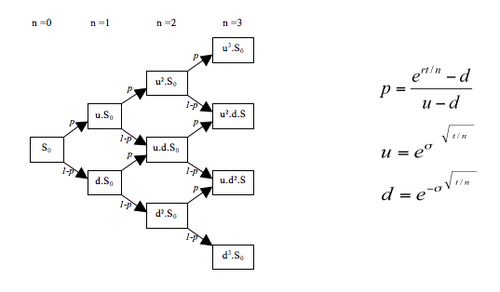

In [ ]:
def first_binomial_call(S, K, T, r, u, d, N):
    """
    Implementation of binomial pricing model

    Parameters
    ----------
    S : float
        stock price

    K : float
        strike price

    T : float
        expiry time in years

    r : float
        risk free rate which could be taken out of the yield of US treasury bonds

    u : float
        size of upfactor move

    d : float
        size of downfactor move

    N : int
        number of steps in binomial model

    Returns
    -------
    C : dict
        the binary pricing model in the form of dictionary
    """

    q = (np.exp(r * t) - d) / (u - d)

    stock_prices = np.zeros((N + 1, N + 1))
    stock_prices[0, 0] = S

    for i in range(1, N + 1):
        stock_prices[i, 0] = stock_prices[i - 1, 0] * u
        for j in range(1, i + 1):
            stock_prices[i, j] = stock_prices[i - 1, j - 1] * d

    option_values = np.maximum(0, stock_prices[N, :] - K)

    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_values[j] = np.exp(-r * t) * (q * option_values[j] + (1 - q) * option_values[j + 1])

    return {'C': option_values[0]}


In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated by n step binomial model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = first_binomial_call(S = df['Close'][len(df)-1], K = K, T = T, r=0.01*t, u = u, d =d, N=N)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,C
1200.0,3498.350155
2600.0,2098.350223
2900.0,1798.350237
3000.0,1698.350242
3400.0,1298.350261


In [ ]:
#price of actual calls
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()


,ac_call
strike,
1200.0,3537.20
2600.0,2007.60
2900.0,1706.43
3000.0,1598.64
3400.0,1370.52


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,C,ac_call
1200.0,3498.350155,3537.20
2600.0,2098.350223,2007.60
2900.0,1798.350237,1706.43
3000.0,1698.350242,1598.64
3400.0,1298.350261,1370.52
3450.0,1248.350263,1261.59
3500.0,1198.350266,1065.19
3650.0,1048.350273,1068.88
3800.0,898.350280,840.40
3900.0,798.350285,865.17


<Axes: >

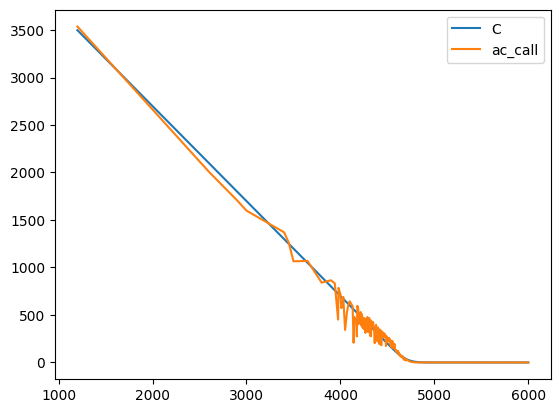

In [ ]:
call.plot() #plotting the actual and theoretical option prices